# 一起来打怪之 Credit Scoring 练习

---
## 作业说明

- 答题步骤：
    - 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
    - 请养成代码注释的好习惯

- 解题思路：
    - 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
    - 解题思路**仅供参考**，鼓励原创解题方法
    - 为督促同学们自己思考，解题思路内容设置为**白色**，必要时请从冒号后拖动鼠标查看

- 所用数据
    - 请注意导入数据库后先**查看和了解数据的基本性质**，后面的问题不再一一提醒

## machine learning for credit scoring


Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


----------
## Read the data into Pandas 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0) #读取数据
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
data.shape #查看数据基本信息

(112915, 11)

------------
## Drop na

In [3]:
data.isnull().sum(axis=0) #统计数据中的缺失值na或null

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
data.dropna(inplace=True) #剔除数据中的na缺失值
data.shape #查看数据基本信息

(108648, 11)

---------
## Create X and y

In [5]:
y = data['SeriousDlqin2yrs'] #将其中的一列数据复制，表示是否超过90天逾期拖欠的数据
X = data.drop('SeriousDlqin2yrs', axis=1) #删除超过90天的逾期拖欠的人的数据

In [6]:
y.mean() #显示当前y的平均值

0.06742876076872101

---
## 练习1：把数据切分成训练集和测试集
- 提示：<span style='color:white'>from sklearn.model_selection import train_test_split('Gender') </span>

In [7]:
from sklearn.model_selection import train_test_split
#使用数据集划分函数，设置测试集比例30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape #查看训练集和测试集

((76053, 10), (32595, 10), (76053,), (32595,))

----
## 练习2：使用logistic regression/决策树/SVM/KNN...等sklearn分类算法进行分类
尝试查sklearn API了解模型参数含义，调整不同的参数

### Logistic regression
- 提示：<span style='color:white'>from sklearn import linear_model('Gender') </span>

In [8]:
#特征标准化
import numpy as np
import matplotlib
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
sc.fit(X_train)
sc.mean_
sc.scale_
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [14]:
#进行逻辑回归
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, max_iter=100, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

### Decision Tree
- 提示：<span style='color:white'>from sklearn.tree import DecisionTreeClassifier('Gender') </span>

In [25]:
#进行决策树训练
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Random Forest
- 提示：<span style='color:white'>from sklearn.ensemble import RandomForestClassifier('Gender') </span>

In [11]:
#进行随机森林训练
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', 
                                n_estimators=10, # The number of trees in the forest.
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train_std, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=2,
                       random_state=1)

### SVM
- 提示：<span style='color:white'>from sklearn.svm import SVC('Gender') </span>

In [34]:
#进行SVM训练
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC
SVC = LinearSVC()
SVC.fit(X_train_std, y_train)

/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/root/miniconda3/envs/ictp-ap/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

### KNN
- 提示：<span style='color:white'>from sklearn.neighbors import KNeighborsClassifier('Gender') </span>

In [20]:
#进行KNN训练
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
KNN.fit(X_train_std, y_train)

KNeighborsClassifier()

---

## 练习3：在测试集上进行预测，计算准确度

### Logistic regression
- 提示：<span style='color:white'>y_pred_LR = clf_LR.predict(x_test)('Gender') </span>

In [15]:
from sklearn.metrics import accuracy_score
y_pred_LR = lr.predict(X_test_std) #用测试集进行预测
accuracy_score(y_test, y_pred_LR) #计算准确度

0.9339162448228255

### Decision Tree
- 提示：<span style='color:white'>y_pred_tree = tree.predict(x_test)('Gender') </span>

In [26]:
y_pred_tree = tree.predict(X_test_std) #用测试集进行预测
accuracy_score(y_test, y_pred_tree) #计算准确度

0.935020708697653

### Random Forest
- 提示：<span style='color:white'>y_pred_forest = forest.predict(x_test)('Gender') </span>

In [16]:
y_pred_forest = forest.predict(X_test_std) #用测试集进行预测
accuracy_score(y_test, y_pred_forest) #计算准确度

0.9327197422917626

### SVM
- 提示：<span style='color:white'>y_pred_SVC = clf_svc.predict(x_test)('Gender') </span>

In [35]:
y_pred_SVC = SVC.predict(X_test_std) #用测试集进行预测
accuracy_score(y_test, y_pred_SVC) #计算准确度

0.9336094493020402

### KNN
- 提示：<span style='color:white'>y_pred_KNN = neigh.predict(x_test)('Gender') </span>

In [21]:
y_pred_KNN = KNN.predict(X_test_std) #用测试集进行预测
accuracy_score(y_test, y_pred_KNN) #计算准确度

0.93235158766682

---
## 练习4：查看sklearn的官方说明，了解分类问题的评估标准，并对此例进行评估

**混淆矩阵（Confusion Matrix）相关学习链接**

- Blog:<br>
http://blog.csdn.net/vesper305/article/details/44927047<br>
- WiKi:<br>
http://en.wikipedia.org/wiki/Confusion_matrix<br>
- sklearn doc:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [149]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic regression
cm_LR = confusion_matrix(y_test, y_pred_LR)
print("Logistic Regression:\n", cm_LR)

# Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Decision Tree:\n", cm_tree)

# Random Forest
cm_forest = confusion_matrix(y_test, y_pred_forest)
print("Random Forest:\n", cm_forest)

#SVM
cm_SVM = confusion_matrix(y_test, y_pred_SVC)
print("SVM:\n", cm_SVM)

# KNN
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
print("KNN:\n", cm_KNN)

Logistic Regression:
 [[30349    75]
 [ 2079    92]]
Decision Tree:
 [[30104   320]
 [ 1798   373]]
Random Forest:
 [[30084   340]
 [ 1853   318]]
SVM:
 [[30415     9]
 [ 2155    16]]
KNN:
 [[30141   283]
 [ 1922   249]]


<Axes: >

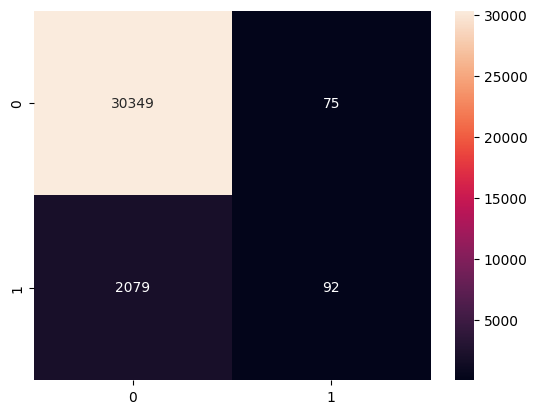

In [152]:
sns.heatmap(cm_LR, annot = True, fmt = 'd')

<Axes: >

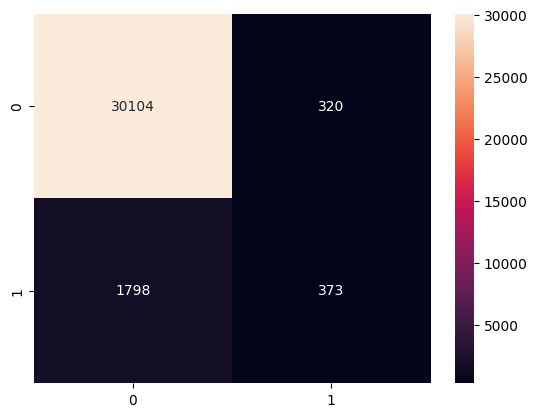

In [48]:
sns.heatmap(cm_tree, annot = True, fmt = 'd')

<Axes: >

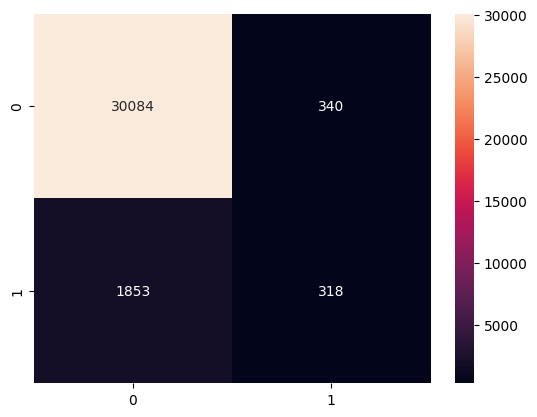

In [49]:
sns.heatmap(cm_forest, annot = True, fmt = 'd')

<Axes: >

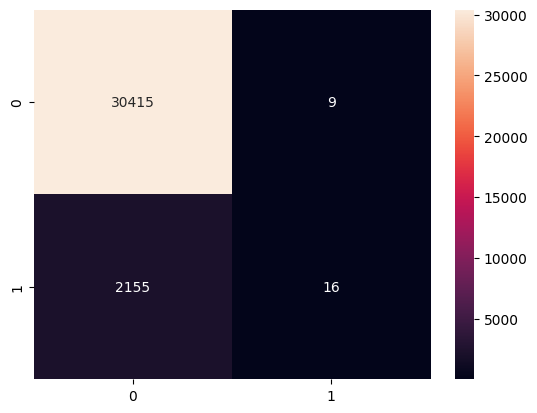

In [50]:
sns.heatmap(cm_SVM, annot = True, fmt = 'd')

<Axes: >

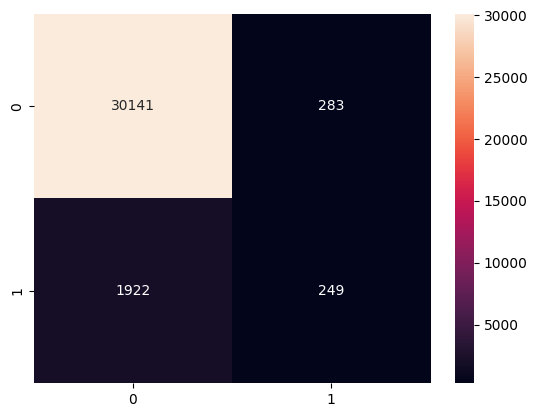

In [51]:
sns.heatmap(cm_KNN, annot = True, fmt = 'd')

## 练习5：调整模型的标准

银行通常会有更严格的要求，因为fraud带来的后果通常比较严重，一般我们会调整模型的标准。<br>

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”，试试看把阈值设定为0.3，再看看这时的评估指标(主要是准确率和召回率)。

- 提示：<span style='color:white'>sklearn的很多分类模型，predict_prob可以拿到预估的概率，可以根据它和设定的阈值大小去判断最终结果(分类类别)('Gender') </span>

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

lr = LogisticRegression(C=1000.0, max_iter=100, random_state=0)
lr.fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std) #用测试集进行预测

accuracy_score(y_test, y_pred_lr) #计算准确度
cm = confusion_matrix(y_test, y_pred_lr) # 混淆矩阵
accuracy = accuracy_score(y_test, y_pred_lr) # 计算准确度
precision = precision_score(y_test, y_pred_lr) # 计算精确度
recall = recall_score(y_test, y_pred_lr) # 计算召回率
f1 = f1_score(y_test, y_pred_lr) 

print("混淆矩阵:\n",cm)
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)
print("f1 score:",f1)

混淆矩阵:
 [[30349    75]
 [ 2079    92]]
准确度: 0.9339162448228255
精确度: 0.5508982035928144
召回率: 0.04237678489175495
f1 score: 0.07869974337040204


In [144]:
threshold = 0.5
y_pred_adjusted = (lr.predict_proba(X_test_std)[:,1] > threshold).astype(int)
y_pred_lr=y_pred_adjusted
accuracy = accuracy_score(y_test, y_pred_lr) # 计算准确度
precision = precision_score(y_test, y_pred_lr) # 计算精确度
recall = recall_score(y_test, y_pred_lr) # 计算召回率
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)

准确度: 0.9339162448228255
精确度: 0.5508982035928144
召回率: 0.04237678489175495


In [147]:
threshold = 0.4
y_pred_adjusted = (lr.predict_proba(X_test_std)[:,1] > threshold).astype(int)
y_pred_lr=y_pred_adjusted
accuracy = accuracy_score(y_test, y_pred_lr) # 计算准确度
precision = precision_score(y_test, y_pred_lr) # 计算精确度
recall = recall_score(y_test, y_pred_lr) # 计算召回率
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)

准确度: 0.9340696425832183
精确度: 0.5426356589147286
召回率: 0.06448641179180101


In [145]:
threshold = 0.3
y_pred_adjusted = (lr.predict_proba(X_test_std)[:,1] > threshold).astype(int)
y_pred_lr=y_pred_adjusted
accuracy = accuracy_score(y_test, y_pred_lr) # 计算准确度
precision = precision_score(y_test, y_pred_lr) # 计算精确度
recall = recall_score(y_test, y_pred_lr) # 计算召回率
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)

准确度: 0.9335787697499617
精确度: 0.5066371681415929
召回率: 0.10548134500230309


In [146]:
threshold = 0.2
y_pred_adjusted = (lr.predict_proba(X_test_std)[:,1] > threshold).astype(int)
y_pred_lr=y_pred_adjusted
accuracy = accuracy_score(y_test, y_pred_lr) # 计算准确度
precision = precision_score(y_test, y_pred_lr) # 计算精确度
recall = recall_score(y_test, y_pred_lr) # 计算召回率
print("准确度:",accuracy)
print("精确度:",precision)
print("召回率:",recall)

准确度: 0.9281484890320602
精确度: 0.411946446961895
召回率: 0.18424689083371718


上述结果说明：一般默认概率判定边界为0.5，当从0.5减小到0.3时，召回率上升，准确度几乎没有下降，精确度稍微下降一点。说明降低threshold的方法对于提高模型敏感度是有效的。但threshold不能太小。